In [1]:
#%matplotlib notebook

https://kapernikov.com/ipywidgets-with-matplotlib/

In [2]:
from ipywidgets import widgets

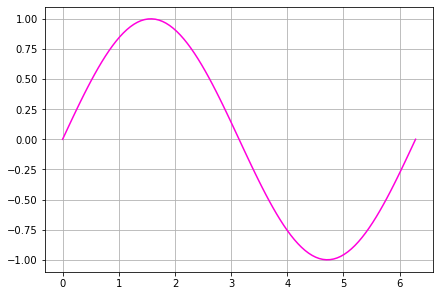

In [3]:
import numpy as np
import matplotlib.pyplot as plt

output = widgets.Output()
 
# create some x data
x = np.linspace(0, 2 * np.pi, 100)
 
# default line color
initial_color = '#FF00DD'
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
    
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'top'
ax.grid(True)    
line, = ax.plot(x, np.sin(x), initial_color)

In [4]:
# create some control elements
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='freq',continuous_update=False)
color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
 
# callback functions
@output.capture(clear_output=True)
def update(change):
    """redraw line (update plot)"""
    line.set_ydata(np.sin(change.new * x))
    display(fig)

@output.capture(clear_output=True)
def line_color(change):
    """set line color"""
    line.set_color(change.new)
    display(fig)

@output.capture(clear_output=True)
def update_xlabel(change):
    ax.set_xlabel(change.new)
    display(fig)

@output.capture(clear_output=True)
def update_ylabel(change):
    ax.set_ylabel(change.new)
    display(fig)

# connect callbacks and traits
int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')
text_xlabel.observe(update_xlabel, 'value')
text_ylabel.observe(update_ylabel, 'value')
 
text_xlabel.value = 'x'
text_ylabel.value = 'y'

In [5]:
controls = widgets.VBox([int_slider, color_picker, text_xlabel, text_ylabel])
widgets.HBox([controls, output])

In [6]:
from ipywidgets import IntSlider, Label
IntSlider(description=r'\(\int_0^t f\)')

IntSlider(value=0, description='\\(\\int_0^t f\\)')